In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [3]:
# Over 4 million records with 7 columns
donations = pd.read_csv("D:/Users/s1037782/Downloads/Donations.csv")
print(donations.info())
print(donations.shape)

FileNotFoundError: [Errno 2] File b'D:/Users/s1037782/Downloads/Donations.csv' does not exist: b'D:/Users/s1037782/Downloads/Donations.csv'

In [6]:
projects = pd.read_csv("/Users/NozukoTwala 1/Desktop/2020/MIT 805/Projects.csv")
print(projects.info())
print(projects.shape)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [6]:
projects.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


### Frequency of project types

In [7]:
projects['Project Type'].value_counts()

Teacher-Led                 1092163
Professional Development      10235
Student-Led                    7619
Name: Project Type, dtype: int64

### Which resources do schools require?

In [8]:
projects['Project Resource Category'].value_counts()

Supplies                          386074
Technology                        299034
Books                             187287
Other                              66909
Computers & Tablets                32915
Educational Kits & Games           22051
Trips                              19886
Instructional Technology           18957
Reading Nooks, Desks & Storage     15327
Flexible Seating                   14425
Classroom Basics                   11862
Art Supplies                        8782
Lab Equipment                       7436
Sports & Exercise Equipment         6733
Food, Clothing & Hygiene            5438
Musical Instruments                 4066
Visitors                            2799
Name: Project Resource Category, dtype: int64

### What is the total cost for these resources?

In [8]:
pivot = projects.pivot_table(values='Project Cost', index=['Project Resource Category'], aggfunc='sum')
result = pivot.sort_values(('Project Cost'), ascending=False)
print(result)

                                Project Cost
Project Resource Category                   
Technology                      2.989005e+08
Supplies                        2.334116e+08
Books                           1.022941e+08
Other                           4.383097e+07
Computers & Tablets             3.645324e+07
Trips                           3.355226e+07
Instructional Technology        1.240648e+07
Educational Kits & Games        1.175126e+07
Reading Nooks, Desks & Storage  1.063706e+07
Flexible Seating                8.693110e+06
Sports & Exercise Equipment     5.678360e+06
Lab Equipment                   5.390497e+06
Classroom Basics                5.305395e+06
Art Supplies                    4.370666e+06
Visitors                        4.181877e+06
Musical Instruments             3.480033e+06
Food, Clothing & Hygiene        2.738665e+06


In [ ]:
from mrjob.job import MRJob

class Projectcostsum(MRJob)
    def mapper(self, _, line):
        line_arr=line.split(",")
        costs = int(line_arr[13])
        category  int(line_arr[12])
        yield category, int(points)
        
    def reducer(self, key, values):
        yield key, sum(value)
        
if __name__== '__main__':
    Projectcostsum.run()
        

In [9]:
pd.crosstab(projects['Project Type'], projects['Project Resource Category'])

Project Resource Category,Art Supplies,Books,Classroom Basics,Computers & Tablets,Educational Kits & Games,Flexible Seating,"Food, Clothing & Hygiene",Instructional Technology,Lab Equipment,Musical Instruments,Other,"Reading Nooks, Desks & Storage",Sports & Exercise Equipment,Supplies,Technology,Trips,Visitors
Project Type,,,,,,,,,,,,,,,,,
Professional Development,4,1456,66,257,12,11,2,101,13,4,92,9,1,239,1590,6309,69
Student-Led,103,733,91,196,77,64,85,176,124,48,335,57,40,2523,2367,538,62
Teacher-Led,8675,185098,11705,32462,21962,14350,5351,18680,7299,4014,66482,15261,6692,383312,295077,13039,2668


In [23]:
df = pd.crosstab(projects['Project Type'], projects['Project Current Status'])
df

Project Current Status,Expired,Fully Funded,Live
Project Type,,,
Professional Development,2049,7699,487
Student-Led,932,6516,171
Teacher-Led,238421,812549,41193


In [22]:
chi2_contingency(df)

(534.692090781807,
 2.0978910373242503e-114,
 4,
 array([[2.22586633e+03, 7.62324319e+03, 3.85890473e+02],
        [1.65694925e+03, 5.67479139e+03, 2.87259356e+02],
        [2.37519184e+05, 8.13465965e+05, 4.11778502e+04]]))

In [11]:
pd.crosstab(projects['Project Current Status'], projects['Project Resource Category'])

Project Resource Category,Art Supplies,Books,Classroom Basics,Computers & Tablets,Educational Kits & Games,Flexible Seating,"Food, Clothing & Hygiene",Instructional Technology,Lab Equipment,Musical Instruments,Other,"Reading Nooks, Desks & Storage",Sports & Exercise Equipment,Supplies,Technology,Trips,Visitors
Project Current Status,,,,,,,,,,,,,,,,,
Expired,354,28439,412,2281,841,842,109,961,306,135,15358,681,232,86600,98558,4527,755
Fully Funded,6802,151168,9105,21020,16918,10102,4799,14224,5615,3245,51546,9932,5407,299474,200476,14881,2025
Live,1626,7680,2345,9614,4292,3481,530,3772,1515,686,5,4714,1094,0,0,478,19


In [12]:
projects.pivot_table(values='Project Cost', index=['Project Type'], aggfunc='mean')

,Project Cost
Project Type,
Professional Development,1067.233590
Student-Led,1200.776686
Teacher-Led,735.267936


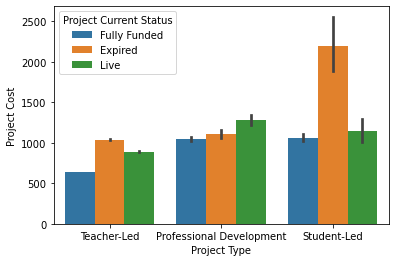

In [13]:
sns.barplot(x="Project Type", y="Project Cost", hue="Project Current Status", data=projects)

In [14]:
projects.pivot_table(values='Project Cost', index=['Project Type'], aggfunc='median')

,Project Cost
Project Type,
Professional Development,907.00
Student-Led,652.08
Teacher-Led,512.93


### Donors

In [5]:
donors = pd.read_csv("D:/Users/s1037782/Downloads/Donors.csv")
print(donors.shape)
print(donors.info())

D:\Users\s1037782\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2122640, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122640 entries, 0 to 2122639
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Donor ID          object
 1   Donor City        object
 2   Donor State       object
 3   Donor Is Teacher  object
 4   Donor Zip         object
dtypes: object(5)
memory usage: 81.0+ MB
None


In [12]:
donors.shape

(2122640, 5)

In [33]:
donations = pd.read_csv("D:/Users/s1037782/Downloads/Donations.csv")
print(donations.shape)
print(donations.head())

(4687884, 7)
                         Project ID                       Donation ID  \
0  000009891526c0ade7180f8423792063  688729120858666221208529ee3fc18e   
1  000009891526c0ade7180f8423792063  dcf1071da3aa3561f91ac689d1f73dee   
2  000009891526c0ade7180f8423792063  18a234b9d1e538c431761d521ea7799d   
3  000009891526c0ade7180f8423792063  38d2744bf9138b0b57ed581c76c0e2da   
4  000009891526c0ade7180f8423792063  5a032791e31167a70206bfb86fb60035   

                           Donor ID Donation Included Optional Donation  \
0  1f4b5b6e68445c6c4a0509b3aca93f38                                  No   
1  4aaab6d244bf3599682239ed5591af8a                                 Yes   
2  0b0765dc9c759adc48a07688ba25e94e                                 Yes   
3  377944ad61f72d800b25ec1862aec363                                 Yes   
4  6d5b22d39e68c656071a842732c63a0c                                 Yes   

   Donation Amount  Donor Cart Sequence Donation Received Date  
0           178.37              

In [15]:
donations.shape

(4687884, 7)

In [32]:
schools = pd.read_csv("D:/Users/s1037782/Downloads/Schools.csv")
print(schools.shape)
print(schools.head())

(72993, 9)
                          School ID                             School Name  \
0  00003e0fdd601b8ea0a6eb44057b9c5e              Capon Bridge Middle School   
1  00004e32a448b4832e1b993500bf0731  The Woodlands College Park High School   
2  0002021bb799f28de224f1acc1ff08c4        Samantha Smith Elementary School   
3  0004604f675212a8cac1161338265196            Kingsbury Country Day School   
4  0004c9d50bcf0cea990f844e58b5e2c3              Redwater Elementary School   

  School Metro Type  School Percentage Free Lunch   School State  School Zip  \
0             rural                          56.0  West Virginia       26711   
1             urban                          41.0          Texas       77384   
2          suburban                           2.0     Washington       98074   
3           unknown                          76.0       Michigan       48370   
4             rural                          50.0          Texas       75573   

     School City School County   

In [23]:
schools.head(5)

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


In [24]:
schools.shape

(72993, 9)

In [25]:
schools['School City'].value_counts().sort_values(ascending=False).head(20)

New York City    2051
Houston           729
Chicago           725
Los Angeles       644
San Antonio       379
Philadelphia      371
Dallas            352
Phoenix           312
Baltimore         296
Columbus          288
Las Vegas         266
San Diego         264
Miami             259
Indianapolis      255
Springfield       245
Austin            236
Denver            234
Jacksonville      229
San Jose          229
Cleveland         222
Name: School City, dtype: int64

In [27]:
donors['Donor City'].value_counts().sort_values(ascending=False).head(20)

Chicago          34352
New York         27863
Brooklyn         22330
Los Angeles      18320
San Francisco    16925
Houston          15839
Portland         13039
Seattle          12984
Atlanta          12537
Philadelphia     12381
Washington       11568
Charlotte        10290
Austin           10249
Indianapolis     10125
Phoenix           9645
Miami             9605
San Diego         9205
Denver            8937
Dallas            8593
Minneapolis       8571
Name: Donor City, dtype: int64

In [31]:
teachers = pd.read_csv("D:/Users/s1037782/Downloads/Teachers.csv")
print(teachers.shape)
print(teachers.head())

(402900, 3)
                         Teacher ID Teacher Prefix  \
0  00000f7264c27ba6fea0c837ed6aa0aa           Mrs.   
1  00002d44003ed46b066607c5455a999a           Mrs.   
2  00006084c3d92d904a22e0a70f5c119a            Mr.   
3  0000a9af8b6b9cc9e41f53322a8b8cf1            Ms.   
4  0000d4777d14b33a1406dd6c9019fe89            Ms.   

  Teacher First Project Posted Date  
0                        2013-08-21  
1                        2016-10-23  
2                        2016-09-08  
3                        2015-10-25  
4                        2017-02-10  
